In [1]:
"""This script installs the required packages for data analysis and machine learning.
It uses pip to install the latest versions of numpy, pandas, scikit-learn, scipy"""

%pip install numpy pandas scikit-learn scipy matplotlib seaborn --upgrade


  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ----------------------


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
'''Importing necessary libraries for anomaly detection and data analysis.'''

import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# Analyzing & Preprocessing Daset 

In [7]:
df = pd.read_csv(r'D:\projects\anamoly_detection\project_setup\credit_card_fraud_dataset.csv')
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [8]:
# geting information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB
None


In [15]:
# Checking for null values in the dataset
df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

### Extracting date, time, weekday, month  from transaction date 

In [25]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])


In [26]:
df['hour']= df['TransactionDate'].dt.hour
df['day']= df['TransactionDate'].dt.day
df['weekday']= df['TransactionDate'].dt.weekday
df['month']= df['TransactionDate'].dt.month
df['year']= df['TransactionDate'].dt.year

In [27]:
df.drop(['TransactionDate'], axis=1, inplace=True)

### Encoding TransactionType 

In [39]:
le_encode = LabelEncoder()
df['TransactionType']  = le_encode.fit_transform(df['TransactionType'])

In [40]:
df['TransactionType'].head()

0    1
1    1
2    0
3    0
4    0
Name: TransactionType, dtype: int64

### Analyzing Location dfield

In [50]:
print(df['Location'].nunique())
print(df['Location'].value_counts())

10
Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64


Since you have only 10 cities, go with One-Hot Encoding — it’s cleaner for purely categorical columns like Location.

In [ ]:
# One-hot encode 'Location' and drop the original
df = pd.get_dummies(df, columns=['Location'], drop_first=True)

In [52]:
df.head(5)

,TransactionID,Amount,MerchantID,TransactionType,IsFraud,hour,day,weekday,month,year,Location_Dallas,Location_Houston,Location_Los Angeles,Location_New York,Location_Philadelphia,Location_Phoenix,Location_San Antonio,Location_San Diego,Location_San Jose
0,1,4189.27,688,1,0,14,3,2,4,2024,False,False,False,False,False,False,True,False,False
1,2,2659.71,109,1,0,13,19,1,3,2024,True,False,False,False,False,False,False,False,False
2,3,784.00,394,0,0,10,8,0,1,2024,False,False,False,True,False,False,False,False,False
3,4,3514.40,944,0,0,23,13,5,4,2024,False,False,False,False,True,False,False,False,False
4,5,369.07,475,0,0,18,12,4,7,2024,False,False,False,False,False,True,False,False,False


# Visualize Class Distribution

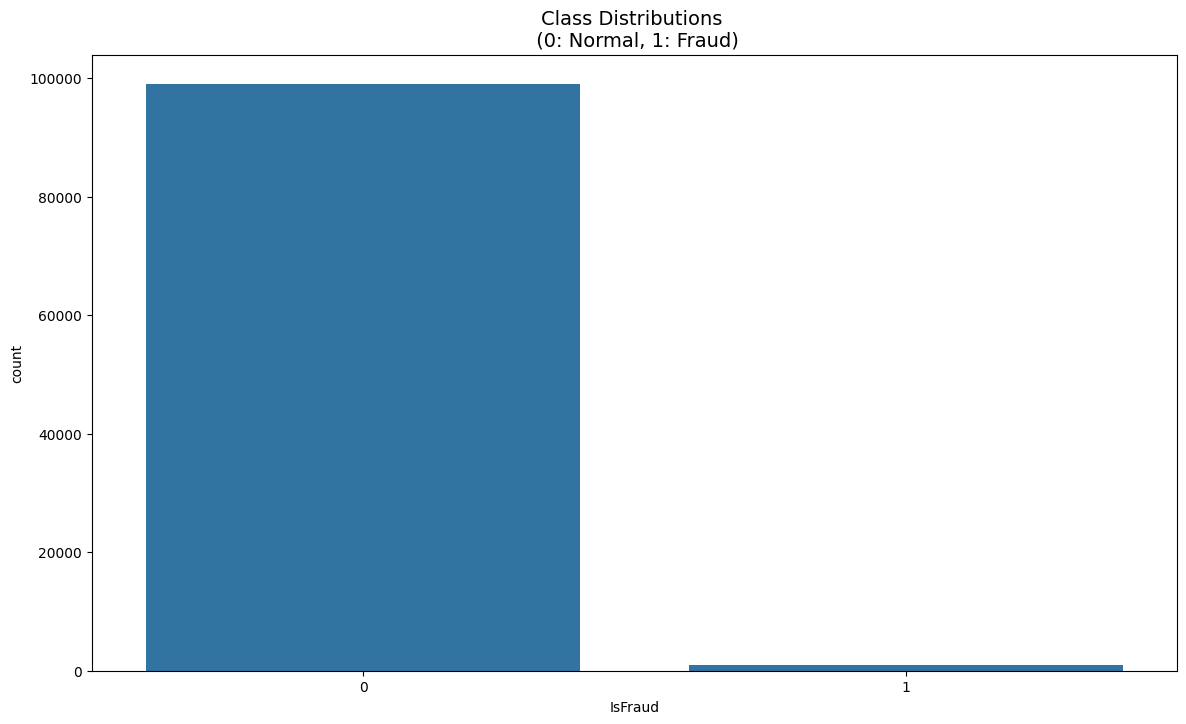

In [41]:
sns.countplot(x='IsFraud', data=df)
plt.title('Class Distributions \n (0: Normal, 1: Fraud)', fontsize=14)
plt.show()

# Feature Selection and Scaling (if needed)

In [42]:
print(df['IsFraud'].value_counts(normalize=True))

IsFraud
0    0.99
1    0.01
Name: proportion, dtype: float64


In [54]:
# dropin target column from the dataset

x = df.drop(['IsFraud'], axis=1)
y = df['IsFraud']


We're scaling all features to have mean = 0 and std = 1 using StandardScaler.
This ensures features like Amount and Hour are on the same scale.
Isolation Forest is distance-based — unscaled data can bias results.
fit_transform(X) fits the scaler and transforms the data in one step.

In [ ]:
# Scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


       TransactionID   Amount  MerchantID  TransactionType  hour  day  \
0                  1  4189.27         688                1    14    3   
1                  2  2659.71         109                1    13   19   
2                  3   784.00         394                0    10    8   
3                  4  3514.40         944                0    23   13   
4                  5   369.07         475                0    18   12   
...              ...      ...         ...              ...   ...  ...   
99995          99996  1057.29         289                1     0    7   
99996          99997   297.25         745                1    23   22   
99997          99998  3448.56         690                0    19   31   
99998          99999  3750.79         644                0     9   18   
99999         100000  1596.79         675                1    19    5   

       weekday  month  year  Location_Dallas  Location_Houston  \
0            2      4  2024            False             

In [56]:
x_scaled

array([[-1.73203349,  1.17316072,  0.64535719, ...,  2.9897127 ,
        -0.33538511, -0.32971034],
       [-1.73199885,  0.11274012, -1.3600847 , ..., -0.3344803 ,
        -0.33538511, -0.32971034],
       [-1.73196421, -1.187661  , -0.37295009, ..., -0.3344803 ,
        -0.33538511, -0.32971034],
       ...,
       [ 1.73196421,  0.65963778,  0.65228445, ...,  2.9897127 ,
        -0.33538511, -0.32971034],
       [ 1.73199885,  0.86916923,  0.49295746, ..., -0.3344803 ,
        -0.33538511, -0.32971034],
       [ 1.73203349, -0.6241661 ,  0.60033   , ..., -0.3344803 ,
        -0.33538511, -0.32971034]], shape=(100000, 18))

# Train Isolation Forest

| Parameter            | What It Means                                                                            |
| -------------------- | ---------------------------------------------------------------------------------------- |
| `n_estimators=100`   | Number of **trees** in the forest (like decision trees); more trees = more stability     |
| `contamination=0.01` | Approximate **proportion of anomalies** in the data (1% here); helps model set threshold |
| `random_state=42`    | Ensures **reproducibility** of results by fixing the random seed                         |
| `fit(X_scaled)`      | Fits the Isolation Forest on scaled features (unsupervised — doesn’t use labels)         |


In [68]:
itree = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

iso_forest.predict(X_scaled)

Predicts each data point as either:
-1 → Anomaly
1 → Normal

[1 if i == -1 else 0 for i in pred]

Converts model output to match your IsFraud column:
1 → Fraud (Anomaly)
0 → Normal transaction


In [69]:
predictions = itree.fit_predict(x_scaled)

outliers = [1 if i==-1 else 0 for i in predictions]

# 1.Confusion Matrix

|                       | Predicted Normal (0) | Predicted Fraud (1)  |
| --------------------- | -------------------- | -------------------- |
| **Actual Normal (0)** | True Negatives (TN)  | False Positives (FP) |
| **Actual Fraud (1)**  | False Negatives (FN) | True Positives (TP)  |


It tells you how many:

Normal transactions were predicted correctly (TN)

Frauds were missed (FN), etc.

#  2.Classification Report

| Metric        | Meaning                                                                   |
| ------------- | ------------------------------------------------------------------------- |
| **Precision** | Of the transactions predicted as fraud, how many actually were fraud?     |
| **Recall**    | Of all actual frauds, how many did the model correctly identify?          |
| **F1-score**  | Balance between precision and recall (useful when classes are imbalanced) |
| **Support**   | Number of actual occurrences of each class (0 and 1)                      |


In [73]:
# Printing the results
print("Confusion Matrix:")
print(confusion_matrix(y, outliers)) # Confusion Matrix
print('\n')
print("Classification Report:")
print(classification_report(y, outliers)) # Classification Report
print('\n')
print("Accuracy Score:")
print(accuracy_score(y, outliers))  # Accuracy Score

Confusion Matrix:
[[98017   983]
 [  983    17]]


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     99000
           1       0.02      0.02      0.02      1000

    accuracy                           0.98    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.98      0.98      0.98    100000



Accuracy Score:
0.98034
